<a href="https://colab.research.google.com/github/mehular0ra/Pytorch-Tutorial/blob/main/Pytorch_Linear_Regeression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytorch Linear Regression model is tested on the synthetic data created using the function 0.5*X + 1, and the a standard normal noise is added to every points in the data. Total 20 data points are taken. 

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we want 20 random numbers
N = 20

# generate 20 random numbers
X = np.random.rand(N)*10 - 5

# find the Y values
Y = 0.5*X + 1 + np.random.rand(N)

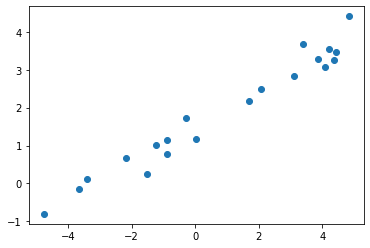

In [3]:
# plot the data
plt.scatter(X, Y);

In [4]:
# create Linear Regression Model
model = nn.Linear(1, 1)

In [5]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
# the data should be in shape while using Pytorch
inputs = X.reshape(N, 1)
targets = Y.reshape(N, 1)

# Pytorch uses Float32 by default
# Numpy uses float64 by default
inputs = torch.from_numpy(inputs.astype(np.float32))
targets = torch.from_numpy(targets.astype(np.float32))

In [7]:
# number of epochs
n_epochs = 50

# list of losses
losses = []
for it in range(n_epochs):
    # reset the optimizer gradients
    optimizer.zero_grad()

    # predict the outputs (Forward Pass)
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # append the loss in losses list
    # using .item() to convert from pytorch to normal python
    # not using .numpy because it is not array
    losses.append(loss.item())

    # do backprop (Backward Pass)
    loss.backward()

    # go to next step
    optimizer.step()

    # print the step for the log
    print(f'Epoch: {it+1}/{n_epochs}, : Loss: {loss.item()}')

Epoch: 1/50, : Loss: 2.4799811840057373
Epoch: 2/50, : Loss: 1.7038509845733643
Epoch: 3/50, : Loss: 1.1860215663909912
Epoch: 4/50, : Loss: 0.8404762148857117
Epoch: 5/50, : Loss: 0.609843909740448
Epoch: 6/50, : Loss: 0.455858051776886
Epoch: 7/50, : Loss: 0.35299569368362427
Epoch: 8/50, : Loss: 0.2842332720756531
Epoch: 9/50, : Loss: 0.23821628093719482
Epoch: 10/50, : Loss: 0.2073712795972824
Epoch: 11/50, : Loss: 0.18664705753326416
Epoch: 12/50, : Loss: 0.17267438769340515
Epoch: 13/50, : Loss: 0.1632060706615448
Epoch: 14/50, : Loss: 0.15674325823783875
Epoch: 15/50, : Loss: 0.1522863209247589
Epoch: 16/50, : Loss: 0.14916826784610748
Epoch: 17/50, : Loss: 0.14694438874721527
Epoch: 18/50, : Loss: 0.145317941904068
Epoch: 19/50, : Loss: 0.14409124851226807
Epoch: 20/50, : Loss: 0.14313210546970367
Epoch: 21/50, : Loss: 0.14235256612300873
Epoch: 22/50, : Loss: 0.14169396460056305
Epoch: 23/50, : Loss: 0.14111699163913727
Epoch: 24/50, : Loss: 0.14059564471244812
Epoch: 25/50, :

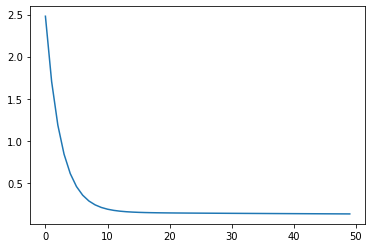

In [8]:
# plot the loss per iteration
plt.plot(losses);

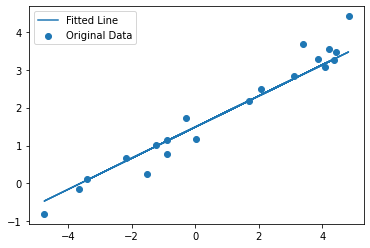

In [9]:
# plot the graph
predicted = model(inputs).detach().numpy()
# print(predicted)

plt.scatter(X, Y, label= 'Original Data'); 
plt.plot(X, predicted, label='Fitted Line');
plt.legend()
plt.show()

In [10]:
predicted = model(inputs).detach().numpy()
print(predicted)

[[ 3.21903   ]
 [ 1.1225207 ]
 [ 1.1240704 ]
 [ 0.8593217 ]
 [ 0.08847427]
 [ 3.2837696 ]
 [ 2.3344145 ]
 [ 3.167397  ]
 [ 0.9764511 ]
 [ 2.7684116 ]
 [ 3.069351  ]
 [ 3.4663692 ]
 [ 1.4986328 ]
 [ 3.3095343 ]
 [ 0.59233105]
 [ 2.1811554 ]
 [-0.01935673]
 [-0.46443546]
 [ 1.3712729 ]
 [ 2.87599   ]]


In [11]:
# To test the efficacy of the model
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.4104584]] [1.4858701]


### The values of weights we get at the end is comparable to the weights we choose when we made synthetic data. Hence we can check the efficacy of the model we make we stiching it on the synthetic data. 